# OZNAL - Predspracovanie a výber atribútov
Miroslav Čulík, Andrej Gáfrik

1. **Opis problému, dát**
2. **Stručný opis prác iných autorov** - pochopenie prác iných autorov, ktorí riešia rovnaký problém je veľmi dôležitou súčasťou skúmania. Môžete sa z iných prác inšpirovať a poučiť. Práce citujte v texte a uveďte v zozname použitej literatúry.
3. **Predspracovanie a výber atribútov** - opis použitých metód a ich výsledky (aj slepé uličky)
4. **DM metódy** - opis použitých metód, alebo predpokladaný scenár použitia (je potrebné poznať DM metódy, ktoré plánujete použiť, aby ste vedeli, ako dáta predspracovať)
5. **Prvotné experimenty**
6. **Vyhodnocovanie** - čo budete vyhodnocovať, aké miery, grafy, kritériá použijete

## Opis problému, dát
Výber toho najdôležitejšieho z minulého reportu

## Stručný opis prác iných autorov

**Vedecké zdroje:**
1. [Housing Price Prediction Using Machine Learning Algorithms: The Case of Melbourne City, Australia](https://ieeexplore.ieee.org/document/8614000)
    - House Sales in Melbourne City dataset (31k riadkov, 21 stlpcov)
    - Linearna regresia 
    - Polynomialna regresia
    - Regression Trees
    - Neuronova sieť
    - SVM
    ![image1.png](attachment:image1.png)
    - metriky: MSE
    
2. [Research on the Sustainable Development of UrbanHousing Price Based on Transport Accessibility:A Case Study of Xi’an, China](https://www.mdpi.com/2071-1050/12/4/1497)
    - Random Forests(M3, M4)
    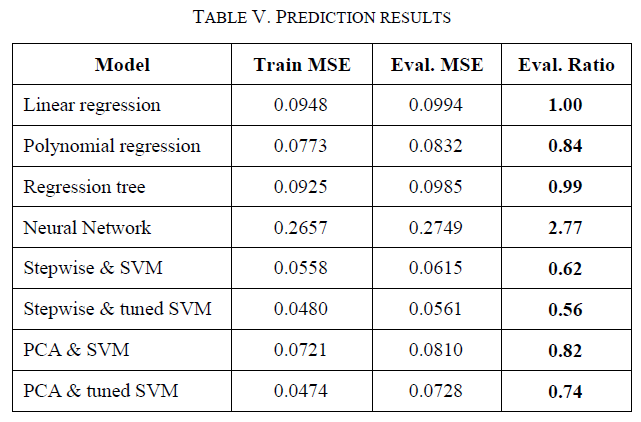
    
3. [A prediction comparison of housing sales prices by parametric versus semi-parametric regressions](https://www.sciencedirect.com/science/article/abs/pii/S105113770400004X)

**Nevedecké zdroje:**
1. https://towardsdatascience.com/regression-using-sklearn-on-kc-housing-dataset-1ac80ca3d6d4
    - naše dáta
    - lineárna regresia
    - viacnásobná regresia
    - polynomiálna regresia
    
    - metriky: R Squared 

2. [Real Estate Price Prediction Using MachineLearning - Data Analytics Research Project](http://trap.ncirl.ie/3096/1/aswinsivamravikumar.pdf)

## Predspracovanie a výber atribútov

- **price** - transformácia pomocou boxcox transformácie a nahradenie outlierov 5-95 percentilom
- **bedrooms** - manuálna úprava inštancie s hodnotou 33 na 3
- **sqft_living** - transformácia pomocou logaritmu a nahradenie outlierov 5-95 percentilom
- **sqft_lot** - transformácia pomocou boxcox transformácie a nahradenie outlierov mediánom
- **sqft_above** - transformácia pomocou boxcox transformácie a nahradenie outlierov 5-95 percentilom
- **sqft_basement** - transformácia pomocou odmocniny a nahradenie outlierov priemerom alebo odstránenie stĺpca
- **sqft_living15** - transformácia pomocou logaritmu a nahradenie outlierov 5-95 percentilom
- **sqft_lot15** - transformácia pomocou boxcox transformácie a nahradenie outlierov mediánom

Okrem zistení sme objavili 10 inštancií, ktoré majú hodnotu 0.0 pri počte kúpeľňového vybavenia v stĺpci `bathroom`, pričom až 7 z nich mám hodnotu počtu spální v atribúte `bedrooms` rovnú 0, zvyšné 3 majú hodnotu 1. Navrhujeme teda týchto 10 inštancií zmazať.

## DM metódy

1. Lineárna regresia
 - jednoduchá
 - viacnásobná
 
2. Polynomiálna regresia
 - stupeň 2
 - stupeň 3

3. Support Vector Regression (SVR)
4. Decission Tree Regression / Regression Tree
5. Random Forest

## Prvotné experimenty

## Vyhodnocovanie

Metriky:
- Mean Square Error (MSE)
- Root Mean Squared Error (RMSE)
- R-squared
- Adjusted R-squared